<a href="https://colab.research.google.com/github/udan2006/Telco_Customer_churn/blob/main/ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Telecom Churn Analysis

This CourseWork is required to perfome binary classification on the telco customer churn dataset to predict customer churn. There are 3 tasks,

Task 1 - Exploratory Data Anlysis (EDA)

Task 2 - Model implementation


1.   Decision Tree
2.   Neural Network based Model


* Conduct all necessary data preprocessing, hyperparameter tuning, and evaluation using appropriate metrics.

*  Compare both models clearly, showing experimental results



Task 3 - AI Ethics









In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.metrics import classification_report, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import confusion_matrix
from psutil import boot_time
from sklearn.metrics import confusion_matrix


import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

## Load Dataset from github

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/udan2006/Telco_Customer_churn/refs/heads/main/Telco-Customer-Churn.csv")
df.shape

(7043, 21)

### **View dataset**

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


### **Dataset Information**

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
#Get unique values for each column
df.apply(lambda x: x.unique())

,0
customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
gender,"[Female, Male]"
SeniorCitizen,"[0, 1]"
Partner,"[Yes, No]"
Dependents,"[No, Yes]"
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
PhoneService,"[No, Yes]"
MultipleLines,"[No phone service, No, Yes]"
InternetService,"[DSL, Fiber optic, No]"
OnlineSecurity,"[No, Yes, No internet service]"


## Exploratory Data Analysis (EDA)

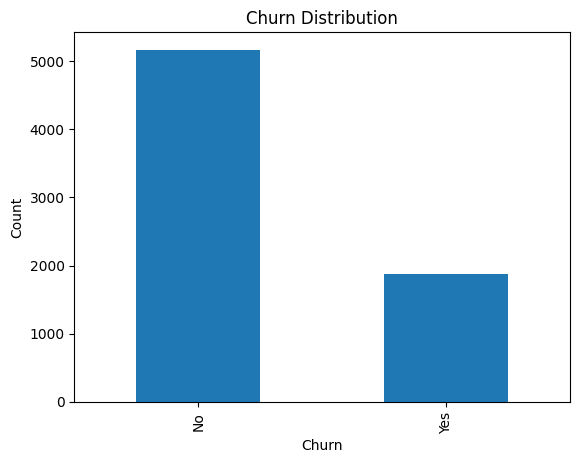

In [9]:
# Churn Distribution
df['Churn'].value_counts().plot(kind="bar")
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

### **Analysis Categorical data**

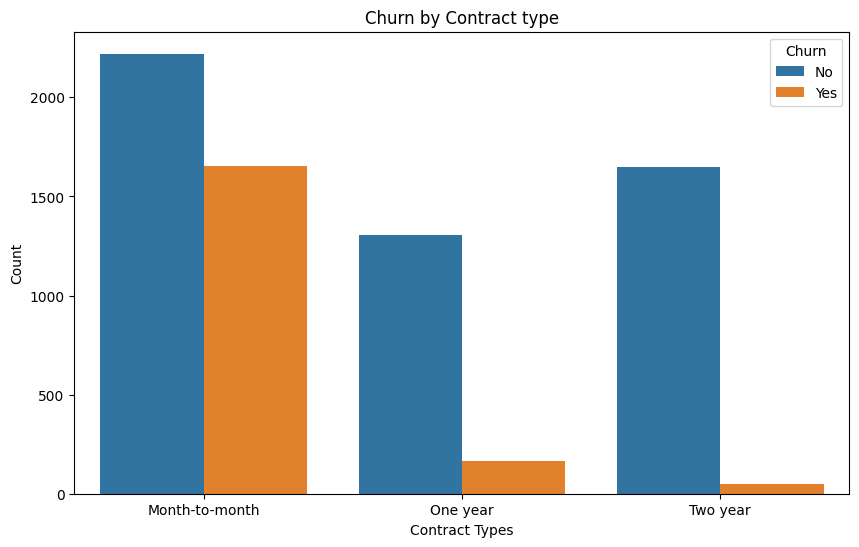

In [10]:
# Churn by Contract type
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract type")
plt.xlabel("Contract Types")
plt.ylabel("Count")
plt.show()

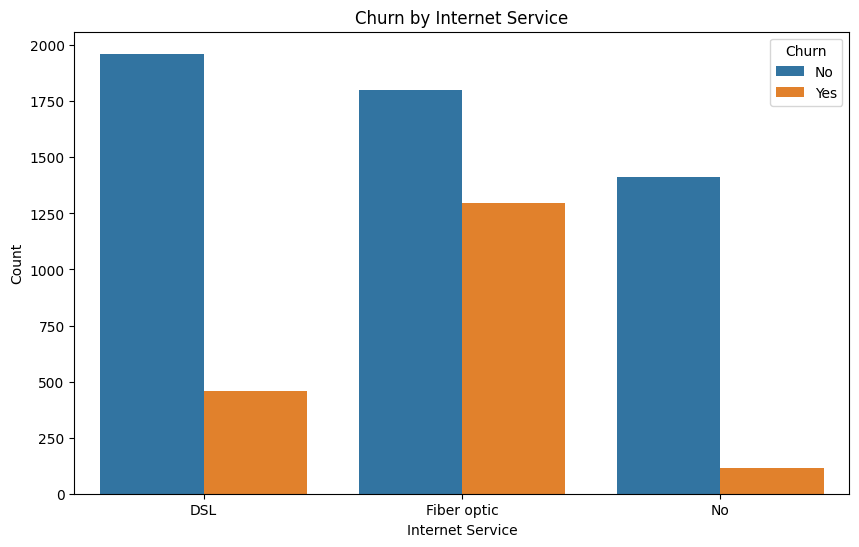

In [11]:
# Churn by Internet Service
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn by Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Count")
plt.show()

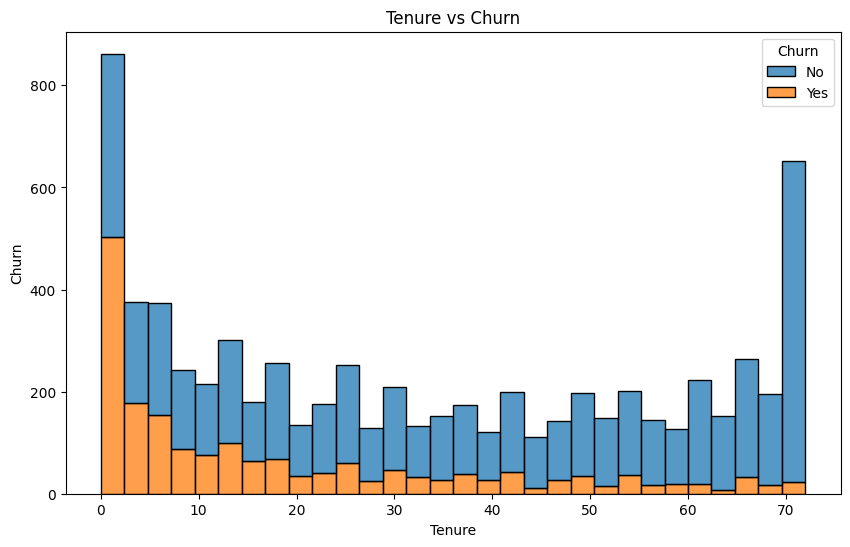

In [12]:
# Tenure vs Churn
plt.figure(figsize=(10, 6))
sns.histplot(x='tenure', hue='Churn', data=df,bins=30,multiple="stack")
plt.title("Tenure vs Churn")
plt.xlabel("Tenure")
plt.ylabel("Churn")
plt.show()

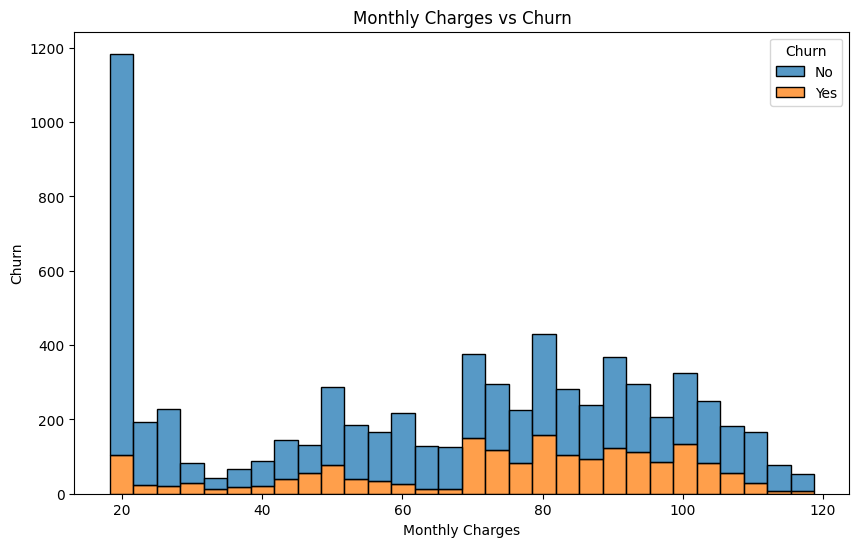

In [13]:
# Monthly Charges vs Churn
plt.figure(figsize=(10, 6))
sns.histplot(x='MonthlyCharges', hue='Churn', data=df,bins=30,multiple="stack")
plt.title("Monthly Charges vs Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Churn")
plt.show()

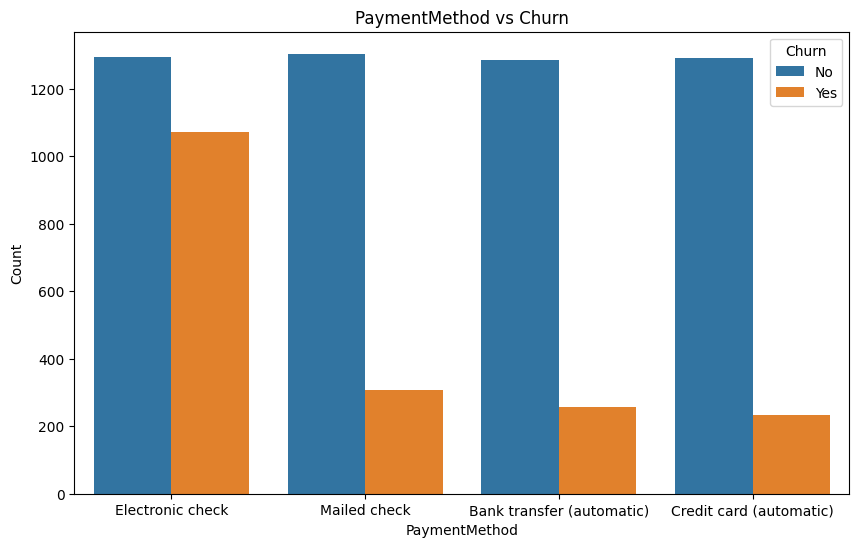

In [14]:
# paymentMethod and Churn
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title("PaymentMethod vs Churn")
plt.xlabel("PaymentMethod")
plt.ylabel("Count")
plt.show()

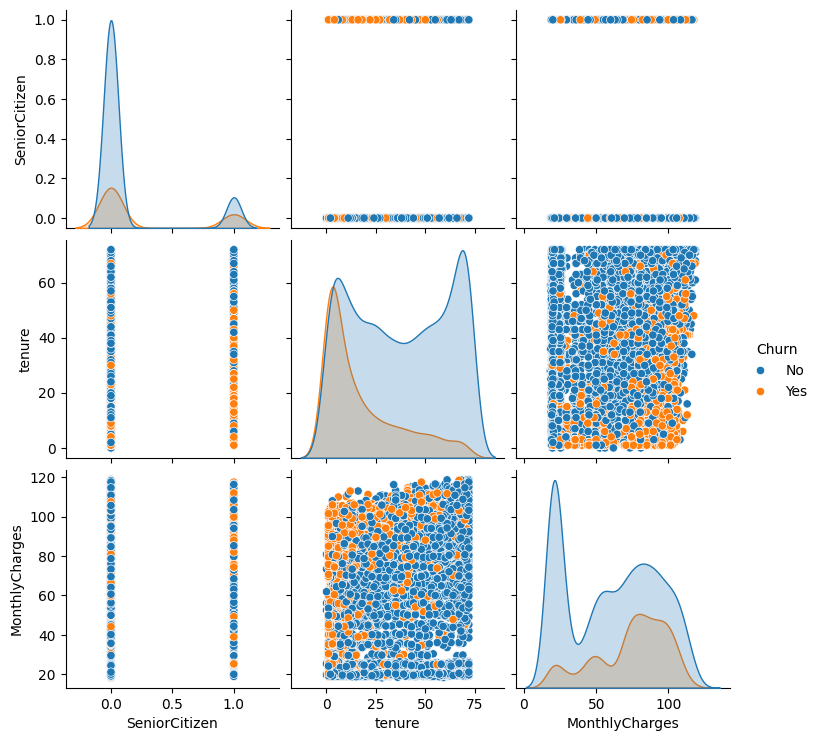

In [15]:
sns.pairplot(df, hue='Churn')
plt.show()

## Data Cleaning and preprocessing

### **Data Cleaning**

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**Convert to numerical values**



In [18]:
#totalCharges convert to the numeric

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
df.corr(numeric_only=True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


### **Correlation Heatmap**



<Axes: >

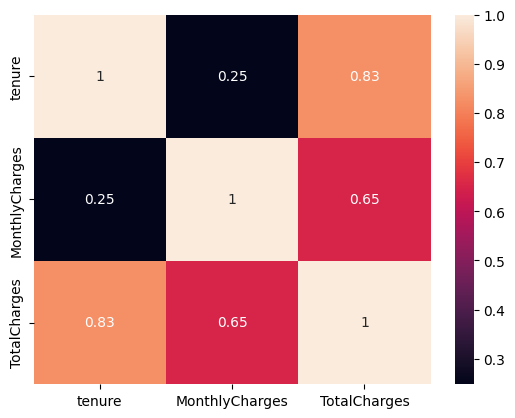

In [21]:
corr = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(corr, annot=True)

### **Data PreProcessing**

**Drop Unnecessary Columns**

In [22]:
df = df.drop(['customerID'], axis=1)

In [23]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Binary Encoding**

In [24]:
binary = ['gender', 'Partner','Dependents','PhoneService','PaperlessBilling']
for feature in binary:
    df[feature] = df[feature].map({'Yes': 1, 'No': 0,'Male': 0, 'Female': 1})

In [25]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


**One-Hot Encoding for Multi-class Categorical Features**

In [27]:
multi_class_features = ['Contract', 'PaymentMethod', 'InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df = pd.get_dummies(df, columns=multi_class_features,drop_first=True)

In [28]:
df.apply(lambda x: x.unique())

,0
gender,"[1, 0]"
SeniorCitizen,"[0, 1]"
Partner,"[1, 0]"
Dependents,"[0, 1]"
tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
PhoneService,"[0, 1]"
PaperlessBilling,"[1, 0]"
MonthlyCharges,"[29.85, 56.95, 53.85, 42.3, 70.7, 99.65, 89.1,..."
TotalCharges,"[29.85, 1889.5, 108.15, 1840.75, 151.65, 820.5..."
Churn,"[0, 1]"


**Feature Scaling**

In [29]:
feature_scaling = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df[feature_scaling] = scaler.fit_transform(df[feature_scaling])

**Separate data into features**

In [30]:
X = df.drop('Churn', axis=1)
Y = df['Churn']

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=42,)

SMORT use for handle classs imbalance

In [32]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

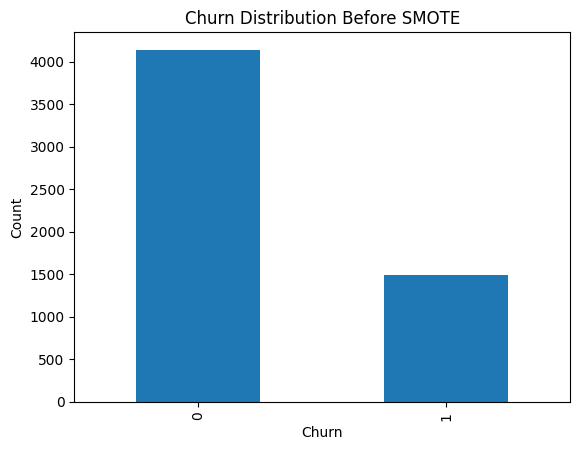

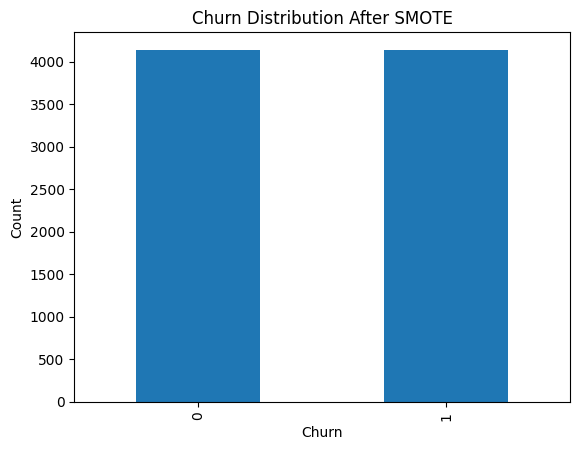

In [33]:
Y_train.value_counts().plot(kind='bar')
plt.title("Churn Distribution Before SMOTE")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

Y_train_res.value_counts().plot(kind='bar')
plt.title("Churn Distribution After SMOTE")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

## Decision Tree

### Basic Decision tree

In [57]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, Y_train_res)

DecisionTreeClassifier(random_state=42)

In [58]:
prediction_test = dt.predict(X_test)
accuracy_score(Y_test, prediction_test)

0.7217885024840313

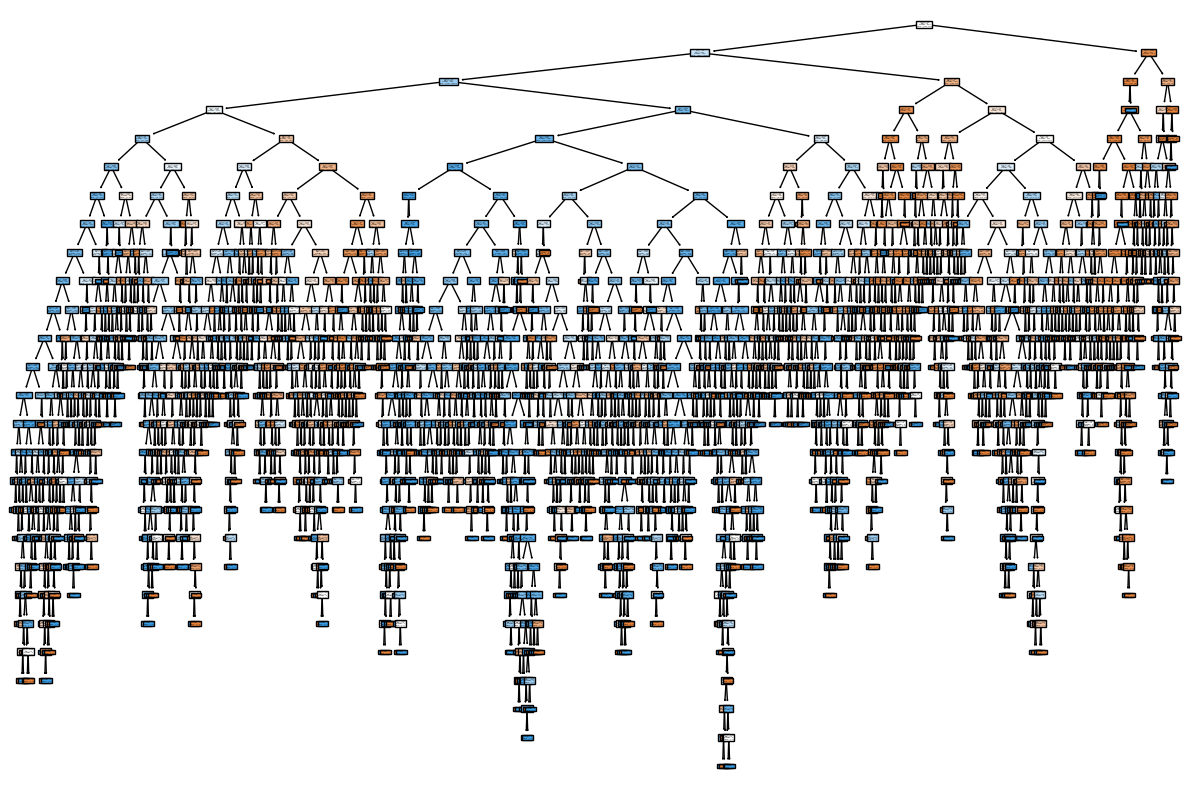

In [59]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)
plt.show()

### Pruning tuning for Decision tree

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Get pruning alphas
path = dt.cost_complexity_pruning_path(X_train_res, Y_train_res)
ccp_alphas = path.ccp_alphas

In [61]:
models = []

for alpha in ccp_alphas:
    pruned_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    pruned_tree.fit(X_train_res, Y_train_res)
    models.append(pruned_tree)

In [62]:
# Evaluate all pruned models

train_acc = []
test_acc  = []
test_auc  = []

for model in models:
    train_acc.append(accuracy_score(Y_train_res, model.predict(X_train_res)))
    test_acc.append(accuracy_score(Y_test, model.predict(X_test)))
    y_prob = model.predict_proba(X_test)[:,1]
    test_auc.append(roc_auc_score(Y_test, y_prob))

In [63]:
# Select best model
best_index = test_auc.index(max(test_auc))

print("Best alpha:", ccp_alphas[best_index])
print("Train Accuracy:", train_acc[best_index])
print("Test Accuracy :", test_acc[best_index])
print("ROC AUC:", test_auc[best_index])

Best alpha: 0.0009635267364539951
Train Accuracy: 0.7765828902851619
Test Accuracy : 0.7459190915542938
ROC AUC: 0.8461964453921558


In [64]:
best_pruning_tree = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alphas[best_index])
best_pruning_tree.fit(X_train_res, Y_train_res)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0009635267364539951),
                       random_state=42)

### Evaluate Decision tree model

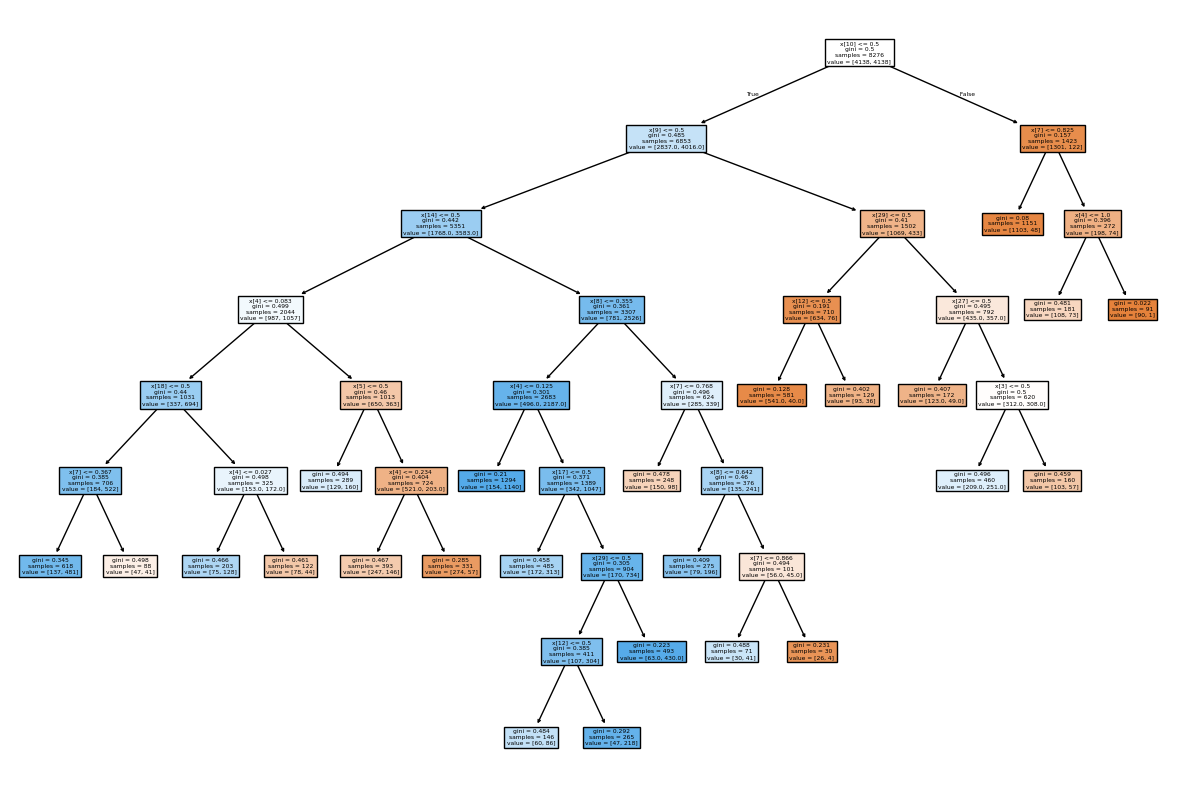

In [65]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(best_pruning_tree,filled=True)
plt.show()

In [66]:
Y_prob = best_pruning_tree.predict_proba(X_test)[:, 1]

In [67]:
y_pred_class = best_pruning_tree.predict(X_test)
y_test_series = pd.Series(y_pred_class)
print(y_test_series.value_counts())

0    824
1    585
Name: count, dtype: int64


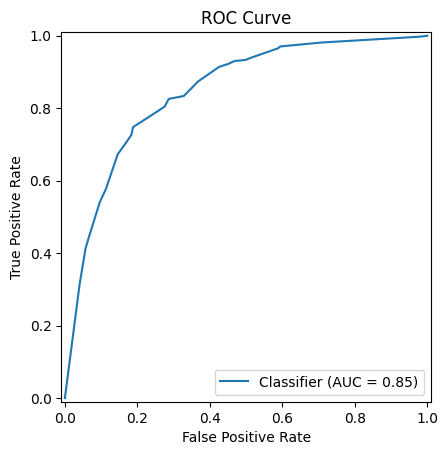

In [68]:
RocCurveDisplay.from_predictions(Y_test,Y_prob)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [69]:
confusion_matrix(Y_test, y_pred_class)

array([[751, 285],
       [ 73, 300]])

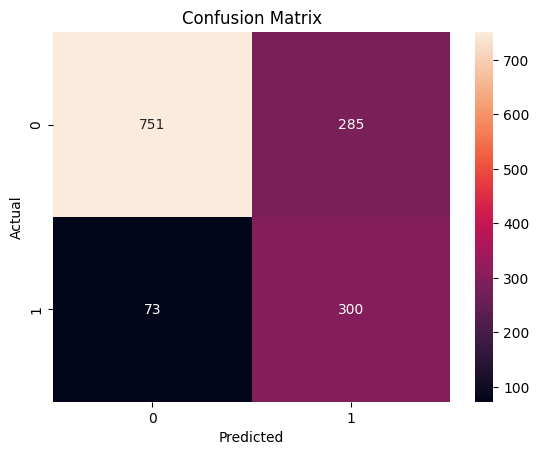

In [70]:
sns.heatmap(confusion_matrix(Y_test, y_pred_class), annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [71]:
print(classification_report(Y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1036
           1       0.51      0.80      0.63       373

    accuracy                           0.75      1409
   macro avg       0.71      0.76      0.72      1409
weighted avg       0.81      0.75      0.76      1409



## Neural Network